In [95]:
import pandas as pd

In [96]:
df=pd.read_csv("odi.csv")

In [97]:
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350894,1188,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,49.2,39,0,59,18,203
350895,1188,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,49.3,39,0,59,18,203
350896,1188,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,49.4,38,0,59,18,203
350897,1188,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,202,8,49.5,38,0,59,18,203


In [100]:
avg_runs_ctry=df.groupby(['bat_team']).total.mean()

Text(0, 0.5, 'Average number of runs scored')

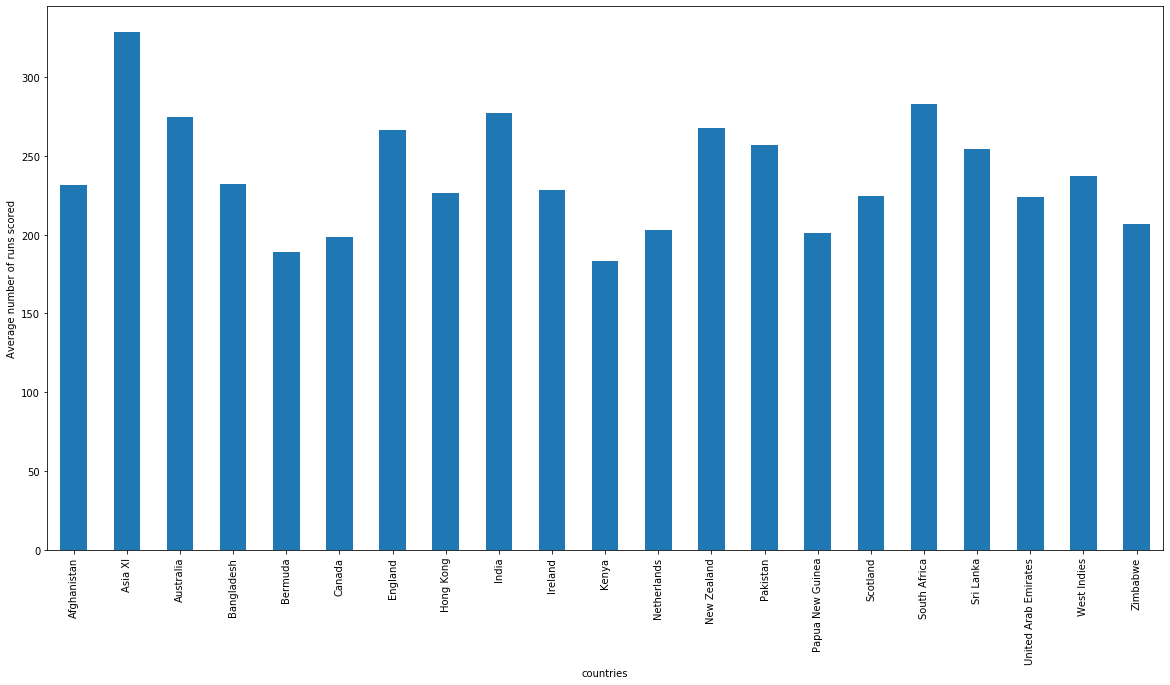

In [101]:
import matplotlib.pyplot as plt
avg_runs_ctry.plot(kind='bar',figsize=(20,10))
plt.xlabel("countries")
plt.ylabel("Average number of runs scored")

In [109]:
df.isna().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [110]:
x=df.iloc[:,[7,8,9,12,13]].values
y=df.iloc[:,14]

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
sc=StandardScaler()

In [115]:
x_train=sc.fit_transform(x_train)

In [116]:
x_test=sc.fit_transform(x_test)

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
lin=LinearRegression()

In [119]:
lin.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
lin.score(x_test,y_test)

0.5273738184438117

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
rfr=RandomForestRegressor(n_estimators=100,max_features=None)

In [123]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [124]:
from sklearn.tree import DecisionTreeRegressor

In [125]:
dtr=DecisionTreeRegressor()

In [126]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [127]:
y_pred=lin.predict(x_test)

In [128]:
score=lin.score(x_test,y_test)*100

In [129]:
print(score)

52.73738184438117


In [130]:
import numpy as np
new_prediction = lin.predict(sc.transform(np.array([[100,0,13,50,50]])))

In [131]:
print("prediction score:",new_prediction)

prediction score: [322.63266607]


In [132]:
y_pred=rfr.predict(x_test)

In [133]:
score=rfr.score(x_test,y_test)*100

In [134]:
score

78.1995915134079

In [135]:
new_prediction1 = rfr.predict(sc.transform(np.array([[100,0,13,50,50]])))

In [136]:
print("random forest regressor prediction:",new_prediction1)

random forest regressor prediction: [317.2]


In [137]:
y_pred=dtr.predict(x_test)

In [138]:
score=dtr.score(x_test,y_test)*100

In [139]:
score

64.11399777435626

In [140]:
new_prediction2 = dtr.predict(sc.transform(np.array([[100,0,13,50,50]])))

In [141]:
print("Decision tree regressor prediction:",new_prediction2)

Decision tree regressor prediction: [303.]
